## **Assignment - Week 6**
**Instructions:**
- Answer each question on a separate cell, inidcating the question first in a markdown cell before giving the answer either in a markdown or code cell depending on the question.
- Use comments in your code
- Give titles to all your charts and give x and y labels where necessary
- Use the ggplot style for your charts

You are provided with a retail transaction dataset contaning customer transaction data.

You are expected to use the dataset to answer the following questions:
1. Get the number of records and variables contained in the dataset and convert all columns to lower case.
2. Is there any null value or duplicate record present?
3. What is the new dataframe shape after dropping null and duplicate if present?
4. Create a new dataframe containing just the numerical variables and access the relationship between the variables.
5. You have a transaction date variable, convert it to a datetime variable and extract the month names and day names into two new columns
6. Check for any outlier in the price column and remove any value that is greater than 300.
7. Plot a scatter plot graph to access tha relationship between price and discount, give the graph a title and make the color green
8. For the new months column you created, plot a line chart showing the total quantity for each month. Use a figure size of 8x5.
9. Also for the days column you created, plot a bar chart showing the average price for each day
10. Which of the product category has the highest quantity sold? represent it in a pie chart. Use a figure size of 7x7

In [6]:
#to import Library and dataset with ggplot style to be used for the chart
#the dataset provided is retail transaction dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
fileName = "C:/Users/DR KAY/Desktop/retail_transaction.csv"
df = pd.read_csv(fileName)
print(df)

      CustomerID ProductID  Quantity   Price  TransactionDate PaymentMethod  \
0            169         B       7.0   76.15  1/31/2024 10:50          Cash   
1            213         C       4.0   85.59  6/26/2023 21:13   Credit Card   
2            315         C       4.0   94.33  8/18/2023 07:01          Cash   
3            442         B       6.0   81.00  8/30/2023 03:37    Debit Card   
4            587         B       1.0   45.68  9/14/2023 23:34   Credit Card   
...          ...       ...       ...     ...              ...           ...   
1162      298695         B       1.0  103.24  6/12/2023 15:01        PayPal   
1163      298721         A       8.0   43.87  7/21/2023 01:17        PayPal   
1164      298832         B       6.0   57.36  6/22/2023 23:33    Debit Card   
1165      298848         D       7.0   82.33  6/25/2023 01:30   Credit Card   
1166      299118         C       7.0   12.56   6/3/2023 02:32   Credit Card   

     ProductCategory  DiscountApplied(%)  
0       

In [11]:
df.head()
df.tail()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1167 non-null   int64  
 1   ProductID           1163 non-null   object 
 2   Quantity            1165 non-null   float64
 3   Price               1155 non-null   float64
 4   TransactionDate     1167 non-null   object 
 5   PaymentMethod       1162 non-null   object 
 6   ProductCategory     1163 non-null   object 
 7   DiscountApplied(%)  1162 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 73.1+ KB


In [13]:
df.describe()

,CustomerID,Quantity,Price,DiscountApplied(%)
count,1167.000000,1165.000000,1155.000000,1162.000000
mean,151016.089117,5.047210,95.031688,11.835026
std,90875.123699,2.591687,572.019909,6.281441
min,169.000000,1.000000,2.820000,0.000000
25%,70726.000000,3.000000,43.945000,6.700000
50%,148717.000000,5.000000,71.920000,12.200000
75%,232307.500000,7.000000,94.950000,16.800000
max,299118.000000,9.000000,17834.000000,24.900000


1.##### **1. Get the number of records and variables contained in the dataset and convert all columns to lower case.** #####

In [102]:
#to get the number of rows and columns
shape = df.shape
display(shape)
print(f"The number of rows or records are {shape[0]} and the number of columns or variables are {shape[1]}")


(1133, 10)

The number of rows or records are 1133 and the number of columns or variables are 10


In [21]:
#to check the format of the columns if they are already in lowerCase or they are in uppercase
df.columns

#To convert into lowercase
x = df.columns.str.lower()
display(x)

#to reassign the lowercase column header into df.columns
df.columns = x
df.columns

Index(['customerid', 'productid', 'quantity', 'price', 'transactiondate',
       'paymentmethod', 'productcategory', 'discountapplied(%)'],
      dtype='object')

Index(['customerid', 'productid', 'quantity', 'price', 'transactiondate',
       'paymentmethod', 'productcategory', 'discountapplied(%)'],
      dtype='object')

##### **2. Is there any null value or duplicate record present?** #####

In [23]:
#To check for null values
df.isna().any().any()

True

In [25]:
#to check the columns that have null values
df.isna().sum()

customerid             0
productid              4
quantity               2
price                 12
transactiondate        0
paymentmethod          5
productcategory        4
discountapplied(%)     5
dtype: int64

In [27]:
#to check for duplicate records
df.duplicated().any()

True

In [29]:
#To check the total duplicated values
df.duplicated().sum()

2

#### **3. What is the new dataframe shape after dropping null and duplicate if present?** ####

In [31]:
#I wan to drop null values using dropna()
df =df.dropna()
df

,customerid,productid,quantity,price,transactiondate,paymentmethod,productcategory,discountapplied(%)
0,169,B,7.0,76.15,1/31/2024 10:50,Cash,Clothing,14.2
1,213,C,4.0,85.59,6/26/2023 21:13,Credit Card,Home Decor,0.5
2,315,C,4.0,94.33,8/18/2023 07:01,Cash,Electronics,20.0
3,442,B,6.0,81.00,8/30/2023 03:37,Debit Card,Home Decor,16.0
4,587,B,1.0,45.68,9/14/2023 23:34,Credit Card,Home Decor,10.3
...,...,...,...,...,...,...,...,...
1162,298695,B,1.0,103.24,6/12/2023 15:01,PayPal,Electronics,7.9
1163,298721,A,8.0,43.87,7/21/2023 01:17,PayPal,Books,1.3
1164,298832,B,6.0,57.36,6/22/2023 23:33,Debit Card,Books,17.1
1165,298848,D,7.0,82.33,6/25/2023 01:30,Credit Card,Home Decor,0.8


In [34]:
#To check if the null values has been drop
df.isna().sum()


customerid            0
productid             0
quantity              0
price                 0
transactiondate       0
paymentmethod         0
productcategory       0
discountapplied(%)    0
dtype: int64

In [36]:
#to remove duplicate values
df =df.drop_duplicates()
df

,customerid,productid,quantity,price,transactiondate,paymentmethod,productcategory,discountapplied(%)
0,169,B,7.0,76.15,1/31/2024 10:50,Cash,Clothing,14.2
1,213,C,4.0,85.59,6/26/2023 21:13,Credit Card,Home Decor,0.5
2,315,C,4.0,94.33,8/18/2023 07:01,Cash,Electronics,20.0
3,442,B,6.0,81.00,8/30/2023 03:37,Debit Card,Home Decor,16.0
4,587,B,1.0,45.68,9/14/2023 23:34,Credit Card,Home Decor,10.3
...,...,...,...,...,...,...,...,...
1162,298695,B,1.0,103.24,6/12/2023 15:01,PayPal,Electronics,7.9
1163,298721,A,8.0,43.87,7/21/2023 01:17,PayPal,Books,1.3
1164,298832,B,6.0,57.36,6/22/2023 23:33,Debit Card,Books,17.1
1165,298848,D,7.0,82.33,6/25/2023 01:30,Credit Card,Home Decor,0.8


In [38]:
#To check the new dataframe
newShape = df.shape
newShape
print(f"The new shape have rows as {newShape[0]} and columns as {newShape[1]}")

The new shape have rows as 1136 and columns as 8


##### **4. Create a new dataframe containing just the numerical variables and access the relationship between the variables.** #####

In [41]:
#To create new dataframe using the selected_type to separate numbers from the other data type
df_num = df.select_dtypes(include = "number")
df_num

,customerid,quantity,price,discountapplied(%)
0,169,7.0,76.15,14.2
1,213,4.0,85.59,0.5
2,315,4.0,94.33,20.0
3,442,6.0,81.00,16.0
4,587,1.0,45.68,10.3
...,...,...,...,...
1162,298695,1.0,103.24,7.9
1163,298721,8.0,43.87,1.3
1164,298832,6.0,57.36,17.1
1165,298848,7.0,82.33,0.8


In [43]:
# To get the relationship between variables
df_num.corr()

,customerid,quantity,price,discountapplied(%)
customerid,1.000000,-0.013920,-0.064676,-0.031963
quantity,-0.013920,1.000000,0.041604,-0.020836
price,-0.064676,0.041604,1.000000,0.050130
discountapplied(%),-0.031963,-0.020836,0.050130,1.000000


##### **5. You have a transaction date variable, convert it to a datetime variable and extract the month names and day names into two new columns** #####

In [45]:
#to check the type of the columns so that i can obtain if the transaction data variable
df.dtypes

customerid              int64
productid              object
quantity              float64
price                 float64
transactiondate        object
paymentmethod          object
productcategory        object
discountapplied(%)    float64
dtype: object

In [47]:
#The transaction date column is an object and i want to convert it to datetime variable
df["transactiondate"] = pd.to_datetime(df["transactiondate"])
df["transactiondate"]

0      2024-01-31 10:50:00
1      2023-06-26 21:13:00
2      2023-08-18 07:01:00
3      2023-08-30 03:37:00
4      2023-09-14 23:34:00
               ...        
1162   2023-06-12 15:01:00
1163   2023-07-21 01:17:00
1164   2023-06-22 23:33:00
1165   2023-06-25 01:30:00
1166   2023-06-03 02:32:00
Name: transactiondate, Length: 1136, dtype: datetime64[ns]

In [49]:
#To check if conversion in the transactiondate is now datetime type
df.dtypes

customerid                     int64
productid                     object
quantity                     float64
price                        float64
transactiondate       datetime64[ns]
paymentmethod                 object
productcategory               object
discountapplied(%)           float64
dtype: object

In [51]:
print(dir(df["transactiondate"].dt))

['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__frozen', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_accessors', '_add_delegate_accessors', '_constructor', '_delegate_method', '_delegate_property_get', '_delegate_property_set', '_dir_additions', '_dir_deletions', '_freeze', '_get_values', '_hidden_attrs', '_parent', '_reset_cache', 'as_unit', 'ceil', 'date', 'day', 'day_name', 'day_of_week', 'day_of_year', 'dayofweek', 'dayofyear', 'days_in_month', 'daysinmonth', 'floor', 'freq', 'hour', 'is_leap_year', 'is_month_end', 'is_month_start', 'is_quarter_end', 'is_quarter_start', 'is_year_end', 'is_year_start', 'isocalendar', 'microsecond', 'minute', 'month', 'month_name', 'nanosecond', 'normalize', 'qua

In [53]:
#TO extract the Month name into the monthName
df["monthName"] = df["transactiondate"].dt.month_name()
df["monthName"]

0         January
1            June
2          August
3          August
4       September
          ...    
1162         June
1163         July
1164         June
1165         June
1166         June
Name: monthName, Length: 1136, dtype: object

In [55]:
#TO extract the Month name into the monthName
df["dayName"] = df["transactiondate"].dt.day_name()
df["dayName"]

0       Wednesday
1          Monday
2          Friday
3       Wednesday
4        Thursday
          ...    
1162       Monday
1163       Friday
1164     Thursday
1165       Sunday
1166     Saturday
Name: dayName, Length: 1136, dtype: object

In [57]:
#to show if the new columns have been added to the dataFrame (df)
df

,customerid,productid,quantity,price,transactiondate,paymentmethod,productcategory,discountapplied(%),monthName,dayName
0,169,B,7.0,76.15,2024-01-31 10:50:00,Cash,Clothing,14.2,January,Wednesday
1,213,C,4.0,85.59,2023-06-26 21:13:00,Credit Card,Home Decor,0.5,June,Monday
2,315,C,4.0,94.33,2023-08-18 07:01:00,Cash,Electronics,20.0,August,Friday
3,442,B,6.0,81.00,2023-08-30 03:37:00,Debit Card,Home Decor,16.0,August,Wednesday
4,587,B,1.0,45.68,2023-09-14 23:34:00,Credit Card,Home Decor,10.3,September,Thursday
...,...,...,...,...,...,...,...,...,...,...
1162,298695,B,1.0,103.24,2023-06-12 15:01:00,PayPal,Electronics,7.9,June,Monday
1163,298721,A,8.0,43.87,2023-07-21 01:17:00,PayPal,Books,1.3,July,Friday
1164,298832,B,6.0,57.36,2023-06-22 23:33:00,Debit Card,Books,17.1,June,Thursday
1165,298848,D,7.0,82.33,2023-06-25 01:30:00,Credit Card,Home Decor,0.8,June,Sunday


#### **6. Check for any outlier in the price column and remove any value that is greater than 300** ####

In [59]:
#to check for values greater than 300
df["price"].nlargest()

78     17834.0
64      7890.0
359      321.0
17       221.0
467      190.0
Name: price, dtype: float64

In [61]:
#to remove values greater than 300
df= df.drop([78,64,359],axis = 0)
df

,customerid,productid,quantity,price,transactiondate,paymentmethod,productcategory,discountapplied(%),monthName,dayName
0,169,B,7.0,76.15,2024-01-31 10:50:00,Cash,Clothing,14.2,January,Wednesday
1,213,C,4.0,85.59,2023-06-26 21:13:00,Credit Card,Home Decor,0.5,June,Monday
2,315,C,4.0,94.33,2023-08-18 07:01:00,Cash,Electronics,20.0,August,Friday
3,442,B,6.0,81.00,2023-08-30 03:37:00,Debit Card,Home Decor,16.0,August,Wednesday
4,587,B,1.0,45.68,2023-09-14 23:34:00,Credit Card,Home Decor,10.3,September,Thursday
...,...,...,...,...,...,...,...,...,...,...
1162,298695,B,1.0,103.24,2023-06-12 15:01:00,PayPal,Electronics,7.9,June,Monday
1163,298721,A,8.0,43.87,2023-07-21 01:17:00,PayPal,Books,1.3,July,Friday
1164,298832,B,6.0,57.36,2023-06-22 23:33:00,Debit Card,Books,17.1,June,Thursday
1165,298848,D,7.0,82.33,2023-06-25 01:30:00,Credit Card,Home Decor,0.8,June,Sunday


In [63]:
#to check and confirm if all the values are less 300
df["price"].nlargest()

17     221.00
467    190.00
289    153.89
334    153.86
246    153.67
Name: price, dtype: float64

####  **7. Plot a scatter plot graph to access tha relationship between price and discount, give the graph a title and make the color green** ####

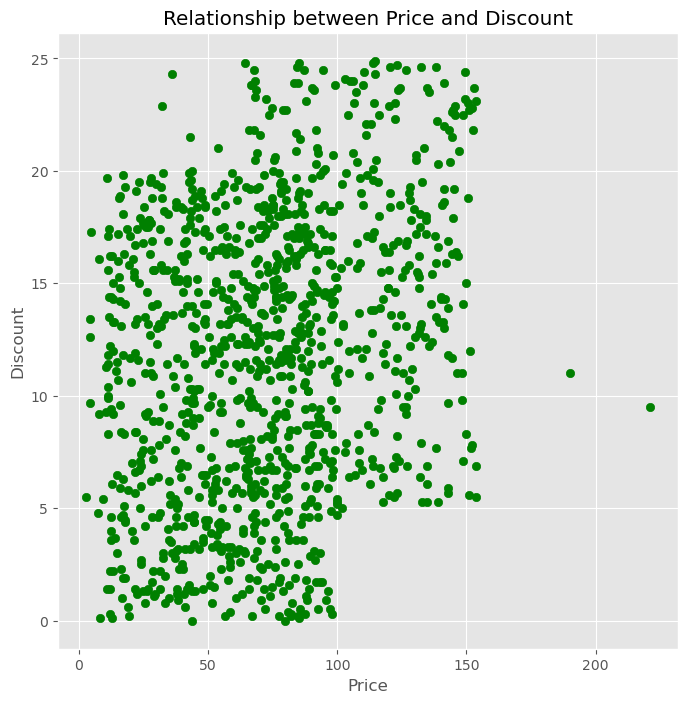

In [66]:
#Scatter plot(price vs discount)
X= df["price"]
Y = df["discountapplied(%)"]
plt.figure(figsize =(8,8))
#the color is added as green
plt.scatter(X, Y, color = "green")
plt.xlabel("Price")
plt.ylabel("Discount")
#The title of the graph
plt.title("Relationship between Price and Discount")
plt.show()

#### **8. For the new months column you created, plot a line chart showing the total quantity for each month. Use a figure size of 8x5.** ####

In [74]:
#use the groupby method to extract the monthName and the quantity
df_TotalQuantity = df.groupby("monthName")["quantity"].sum()

print(df_TotalQuantity)

#to extract the index and values so that it can be use to plot
months=df_TotalQuantity.index
print(months)

TotalQuantity =df_TotalQuantity.values
TotalQuantity

monthName
April        445.0
August       395.0
December     481.0
February     498.0
January      515.0
July         390.0
June         498.0
March        472.0
May          533.0
November     560.0
October      456.0
September    484.0
Name: quantity, dtype: float64
Index(['April', 'August', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September'],
      dtype='object', name='monthName')


array([445., 395., 481., 498., 515., 390., 498., 472., 533., 560., 456.,
       484.])

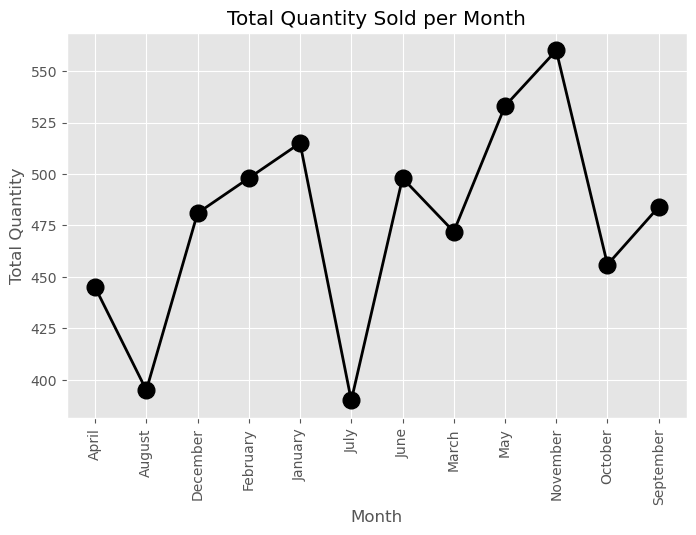

In [108]:
#using figsize of 8*5
plt.figure(figsize=(8,5))
plt.plot(months,TotalQuantity,color = "black",linewidth = 2, markersize = 12, marker ="o")
plt.xlabel("Month")
plt.ylabel("Total Quantity")
plt.title("Total Quantity Sold per Month")
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

#### **9. Also for the days column you created, plot a bar chart showing the average price for each day** ####

In [81]:
#Using the reset-index to set it to it default index and change it from series to a dataframe
df_AveragePrice = round(df.groupby("dayName")["price"].mean().sort_values(ascending = False).reset_index(),2)
df_AveragePrice

,dayName,price
0,Thursday,78.58
1,Saturday,76.89
2,Monday,74.52
3,Sunday,73.65
4,Wednesday,69.96
5,Tuesday,68.35
6,Friday,67.69


In [85]:
#to seperate the index from values
day =df_AveragePrice["dayName"]
print(day)

averagePrice = df_AveragePrice["price"]
print(averagePrice)

0     Thursday
1     Saturday
2       Monday
3       Sunday
4    Wednesday
5      Tuesday
6       Friday
Name: dayName, dtype: object
0    78.58
1    76.89
2    74.52
3    73.65
4    69.96
5    68.35
6    67.69
Name: price, dtype: float64


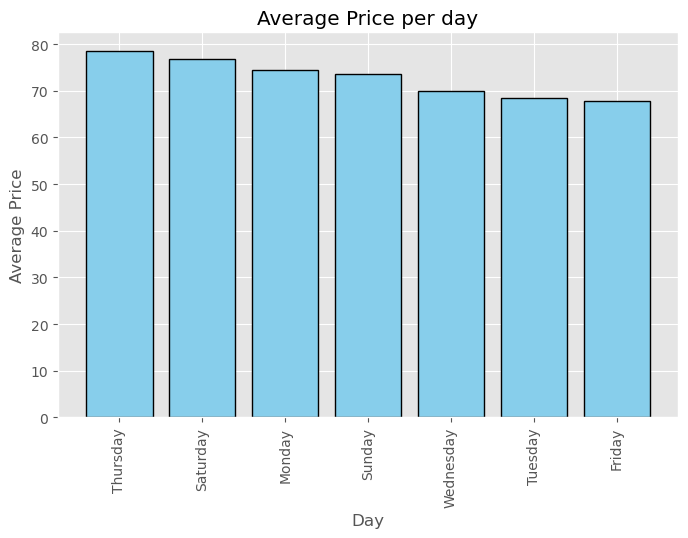

In [87]:
#Figsize is the size of the canvas that the plot will be displayed on
plt.figure(figsize=(8,5))
plt.bar(day, height = averagePrice,color = "skyblue",linewidth = 1,edgecolor="black")
plt.xlabel("Day")
plt.ylabel("Average Price")
plt.title("Average Price per day")
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

#### **10. Which of the product category has the highest quantity sold? represent it in a pie chart** ####
#### **Use a figure size of7x7** ####

In [91]:
#using the productcategory and the quantity to get the highest sold and using groupby to extract the productcategory and the quantity
df_HighestCat = df.groupby("productcategory")["quantity"].sum().sort_values(ascending = False)
df_HighestCat

productcategory
Electronics    2017.0
Books          1941.0
Home Decor     1387.0
Clothing        382.0
Name: quantity, dtype: float64

In [95]:
#To extract the index and values
Category = df_HighestCat.index
print(Category)

QuantitySum = df_HighestCat.values
print(QuantitySum)

Index(['Electronics', 'Books', 'Home Decor', 'Clothing'], dtype='object', name='productcategory')
[2017. 1941. 1387.  382.]


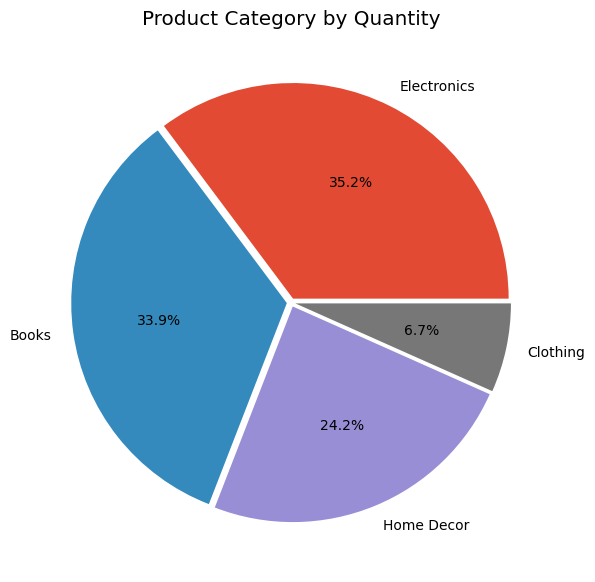

In [97]:
#Using a Pie chart with figSize 7*7
explode = [0.02,0.02,0.02,0.02]
plt.figure(figsize =(7,7))
plt.pie(QuantitySum,labels = Category, autopct ="%1.1f%%", explode = explode)
plt.title("Product Category by Quantity")
plt.show()